In [1]:
import numpy as np
from processing_functions import * 

import os
os.chdir('../') # Go to the parent folder
from support_functions import *
from PCA_Functions import *
os.chdir('Synthetic')

Using TensorFlow backend.


## Define Parameters

In [2]:
k = 50 # Used to compute the precision @ k
n_components = 14 # No components remained after PCA Encoding

## Read Datasets

In [3]:
data, labels, data_train, data_test, labels_train, labels_test = read_data()

## PCA Method

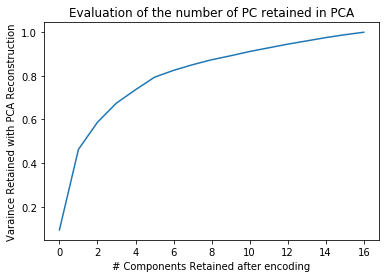

Summary of PCA Encoding: 
Number of Dimension in the Original Dataset: 16
Number of Dimension in the PCA-Encoded Dataset: 14
97.5% variance is retained with the current PCA Reconstruction.



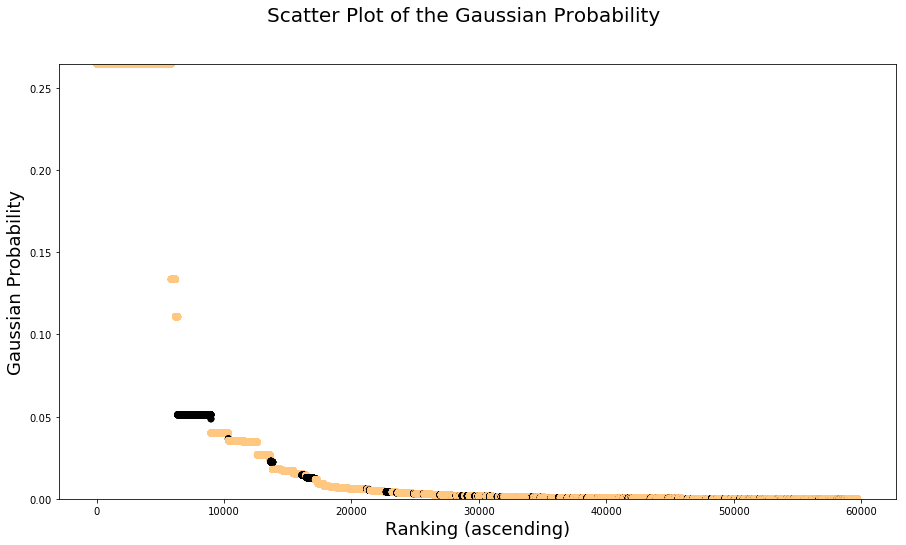

Training Results:
Precision: 13.2%
Recall: 100.0%
F-score: 23.3%
R-Precision (# R = 7022): 2.1%
Precision@50: 0.0%

Testing Results:
Precision: 13.1%
Recall: 100.0%
F-score: 23.2%
R-Precision (# R = 3003): 2.7%
Precision@50: 0.0%



In [4]:
detection_with_pca_gaussian(data_train, data_test,labels_train,labels_test,n_components,k,to_print = True)